<a href="https://colab.research.google.com/github/Data-Science-Apprentices/Ciaren-assignment-two/blob/main/Website_Traffic_Report_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## How did I get my data set?

For this project, I have decided to use [Kaggle](https://www.kaggle.com/). This is a site that provides thousands of free data sets that can be used to perform Exploratory Data Analysis, which is what I'll be doing later on in this report. You can think of Kaggle as a platform that provides a variety of excel files (among others) with prefilled data ready to be used.

## Why multiple?

In this Notebook, I have decided to use two different data sets (both sourced from Kaggle). The main reason I have done this is for variety. The data sets individually didn't contain enough columns for me to make unique and interesting points, which would mean the graphs that I produced would have been similar, therefore resulting in conclusions that would be the same (I basically wanted my graphs to produce different results and not explain the same point continuously)

## What do the data sets contain?

The first data set is called ['Daily website visitors'](https://www.kaggle.com/datasets/bobnau/daily-website-visitors)...

and the second data set is called ['Website traffic'](https://www.kaggle.com/datasets/anthonytherrien/website-traffic)...

## What is coming up?

In this Notebook, we will be:

1. **Setting up the data set**
      
      Here I'll show you how I get the data from the source into this Notebook
2. **Doing some code transformation**

      This is where I will display how I manipulate the data to allow it to be processed by Python
3. **Sharing some initial analysis**

      In this section, I will show you some simple graphs to make initial points. These graphs will get more complex as we go
4. **haring some further analysis**

      Here I will display some more advanced graphs with more detailed analytics & conclusions
5. **Presenting a conclusion**

      Finally, I will present a conclusion where I address my final points after reviewing and analysing all the graphs in this Notebook


# Setting up the data set

In the code snippet below, I call the `.dataset_download()` function, which allows me to directly download the file from Kaggle and store it in my Notebook. In other words, it's an automated way of downloading the file from the website and placing it in my directory.

For example, when the following line is run:

```
DWV_Data = kagglehub.dataset_download("bobnau/daily-website-visitors")
```

It downloads the folder that contains the data and stores it in the notebook.

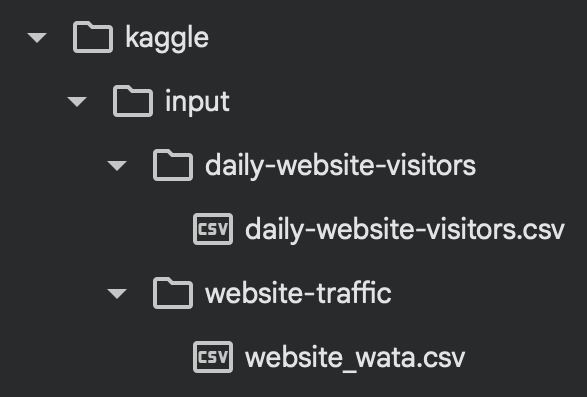


This also means the file isn't hardcoded. This is good because if there are any updates made by the author, when I next run the code it will automatically download the most recent version, meaning my data set remains up to date.

If I downloaded it myself and placed it in the directory, I could be using out of data data that may not be accurate when providing insights and therefore not beneficial to the company I work for.

I have also integrated a `try` statement to help with error handling. When the data downloads, the program prints the message 'Data downloaded'

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

# Fetch raw data from Kaggle (Sets up folders for each data set)
try:
  DWV_Folder = kagglehub.dataset_download("bobnau/daily-website-visitors")
  WT_Folder = kagglehub.dataset_download("anthonytherrien/website-traffic")
  print("Data downloaded")
except:
  print("There has been an issue. Try checking your connection...")

The data sets that I am using in this report do not contain the same number of rows e.g. one has 2100 and the other has 2200. I solve this issue by using the `.sample()` method to allow the user to hand pick how many rows they want the data to analyse.

However, because I've added this adaptability, I also had to include another `try` statement to handle incorrect inputs. If you enter a number that's greater than the number of rows either of the data sets have, the program will tell you to change the `sample_num`

Additionally, I have added an `if else` statement to make sure that the `sample_num` value isn't too low. This prevents you from being able to input 1 as the `sample_num` and breaking the graphs

In [ ]:
# Name of each file to be used
DWV_File_Name = 'daily-website-visitors.csv'
WT_File_Name = 'website_wata.csv'

# Default value of rows to get from each data set
sample_num = 200

try:

  if sample_num > 50:
    # Turning raw data into data frames with pandas
    DWV_df = pd.read_csv(DWV_Folder + '/' + DWV_File_Name).sample(n=sample_num)
    WT_df = pd.read_csv(WT_Folder + '/' + WT_File_Name).sample(n=sample_num)
    print("Data has been converted to a data frame successfully")
  else:
    # Message to inform the user that the sample_num is too low
    print("The sample number provided is too low")
    print("This would mean that the graphs don't have enough data")
except:
  # Message to inform the user that the sample_num is too high
  print("The sample number provided is too large")
  print(f"Change sample_num to a value lower than {sample_num}")

# Code Transformation

Before I make any graphs, I need to alter the data set to allow the code to read columns properly. In it's current state, some of the columns are stored as the wrong data type or contain extra characters (e.g. a comma) that is not required when making calculations.

For example, the column `Page.Loads` might contain a value of `2,842`. This may look like a number (integer), but it's actually being stored as a string (characters and words) so therefore needs to be altered for the program to be able to read it correctly. In this case, we just remove the comma, so it looks like `2842`

In addition to this, we also have to change the data type. As I said before, the values are currently being stored as strings. We need to change them to floats (decimal number) to be able to perform calculations on them.

In [ ]:
# View of what the Data frame looks like before the transformation
DWV_df.info()

# List of columns that need to be transformed
columns = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']

# Iterate over how many columns there are (e.g in this example 4)
for i in range(len(columns)):

  # Replace a comma with a blank space for every value in the column
  DWV_df[columns[i]] = DWV_df[columns[i]].str.replace(',','')
  # Change every value in the column to a float
  DWV_df[columns[i]] = DWV_df[columns[i]].astype(float)

# View of what the Data frame looks like after the transformation
DWV_df.info()



# Initial Analysis

Before we look at any graphs, I have created a function that will be used to calculate how a line of best fit is plotted. I have created a function as I wanted to reduce repition within the code

In [4]:
def CalcFitLine(column, date_column):
  # Calculates the constants to be used in the specified polynomial
  coeffs = np.polyfit(date_column, column, 2)
  # Using the constants, it creates the function (assigned to poly)
  # to allow the y axis to be calculated
  poly = np.poly1d(coeffs)
  # Getting the X axis data required to calculate the Y axis
  x_data = np.linspace(np.min(date_column), np.max(date_column),100)
  # Calculates the X axis data that is actually returned
  x_scale = np.linspace(0, len(date_column),100)
  # Calculating the Y axis values using the polynomial and constants
  y_fit = poly(x_data)

  # Returning the values
  return x_scale, y_fit

The above code is quite confusing, so I'll try and break it down a bit more.

The line `coeffs = np.polyfit(date_column, column, 2)` is what works out the coefficiants (or constants) to be used in the polynomial function. This looks at all the values in the `date_column` and all the values in `column` to work out the three best coefficiants. It returns 3 results  because we used a 2 in the arguments, so the function is trying to match the number to this equation: `y = ax² + bx + c`. Basically, it's trying to find the best three values to make a curved line

The `poly = np.poly1d(coeffs)` just plugs those very constants into the equation. So instead of a, b and c in the formula above, we use the three constants the `polyfit` function calculated



You're probably also wondering why there are two sets of X variables. We'll get to that in a moment.

## Histogram

In [ ]:
# Assigning the 'Session Duration' column to it's own variable
SD = WT_df['Session Duration']

# Making the size of the graphs 10 x 10 with a dpi of 80
figure(figsize=(10, 10), dpi=80)

# Adding the title and x & y labels
plt.title("Average time spent on the website (Session duration)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of sessions")

# Plotting & Showing the graph
plt.hist(SD, 8)
plt.show()


### Code Explanation

Only Joking :)

### Analysis

I think it is clear the type of story this graph is telling us. From our small sample, we can see that the majority of people are only staying on the site for a small period of time. Depending on the type of client, this good either be good or bad.

**1. Bad**

It could be bad as it means that people simply aren't staying on the site, which if you're relying on advertisments to run the site (think of YouTube, TikTok etc) you're potentially not getting enough money flowing in to keep the site running. This could mean you have to downgrade servers, therefore meaning you can't support as much traffic (people coming to the site)

**2. Good**

However, say the site is a Government website and you're trying to find a resource. The aim of the website isn't to keep you there, it's to be easy to use. This would mean that a lower Session duration is a benefit; users are easily able to find what they're looking for and therefore don't need to spend any extra time on the site

## Line Graph

In [ ]:
# Sorting the sampled values to be in date order
# Sorting it by row as the dates are in order in terms of the row
# e.g. 01/10/25 = row 1, 03/10/25 = row 2 etc
dates = DWV_df.sort_values(by=['Row'])
# Creating a variable that only contains the dates
sorted_dates = dates['Date']
# Making the size of the graphs 10 x 10 with a dpi of 80
figure(figsize=(10, 10), dpi=80)

# Converting the dates into numbers so the fit line can be calculated
dates['Date'] = mdates.date2num(pd.to_datetime(dates['Date']))
# Creating a variable that only contains the Page.Loads column
page_loads = dates['Page.Loads']

# Creates the array that is used to display the dates on the x axis label
x_axis_ticks = np.arange(0, sample_num, round(sample_num / 10))
# Calling the custom function to work out the fit line for this graph
x_scale, y_fit = CalcFitLine(page_loads, dates['Date'])

# Plotting the graph and fit line, along with labels and titles
plt.plot(sorted_dates, page_loads)
plt.plot(x_scale, y_fit)
plt.xticks(ticks=x_axis_ticks, rotation=45)
plt.title("How many times a page is loaded per day")
plt.ylabel("# of times a page was loaded")
plt.xlabel("Date")

# Showing the graph
plt.show()

### Code Explanation

At the start of this Notebook, I explained that the data set is sourced from Kaggle. The author of this data set decided to store the dates as objects. This initially meant that I couldn't produce a fit line as an you couldn't perform calculations on this type of object.

To counteract this, I used the line `dates['Date'] = mdates.date2num(pd.to_datetime(dates['Date']))`. This line converts all of the dates to numbers, so it can therefore be used in calculations. This is making use of the `mdates` package from matplotlib that we imported earlier.

You might remember that I used 2 seperate X values in my custom function earlier`x_data = np.linspace(np.min(date_column), np.max(date_column),100)`

`x_scale = np.linspace(0, len(date_column),100)`

The reason this was done was because of the conversion that I just explained. The X axis in this graph aren't numbers, they're objects, so I can't return the first list of numbers as the scale would be completly off. To solve this, I use a seperate list of x values to use for the x axis of the graph.

In short, there is one list for the fit line (calculations) and another list for plotting

### Analysis

After spending time looking at the graph, there are a few conclusions that can be drawn.

**Initial climb**

In the first couple of years, we can see a gradual increase of pages being loaded per day. While showing with variation (peaks and dips), we can see that the pages loaded per day increases roughly 50-60% compared to the start. This shows that potential business strategies (e.g. marketing) could be boosting the traffic of this site.

**Middle**

Despite this initial climb, we can see that traffic to the site dipped massively. From the highest point to the lowest, we can roughly see a 70-80% drop in page loads. This could be due to varied reasons. First, the site could have recieved bad press, causing users to stop using the site. Second, the servers for the site could have been unresponsive in this time, causing people to stop trusting and using the site.

**End**

After the dip, we can see that the site traffic picks up considerably. From the fit line, we can see that (despite the massive dip) the site has recovered and is showing signs of additional growth. This leads me to believe that the issues the site faced was more technical issues rather than press as the site picked up relatively quickly.

## Scatter Graph

In [ ]:
# Sorting the sampled values to be in date order
# Sorting it by row as the dates are in order in terms of the row
# e.g. 01/10/25 = row 1, 03/10/25 = row 2 etc
dates = DWV_df.sort_values(by=['Row'])
# Creating a variable that only contains the dates
sorted_dates = dates['Date']
# Making the size of the graphs 10 x 10 with a dpi of 80
figure(figsize=(10, 10), dpi=80)

# Converting the dates into numbers so the fit line can be calculated
dates['Date'] = mdates.date2num(pd.to_datetime(dates['Date']))

# Assiging each 'visit' type to it's own variable
unique_visits = dates['Unique.Visits']
First_Time_Visits = dates['First.Time.Visits']
Returning_Visits = dates['Returning.Visits']

# Creates the array that is used to display the dates on the x axis label
x_axis_ticks = np.arange(0, sample_num, round(sample_num / 10))

# Plotting data for each of the columns
plt.scatter(sorted_dates,
            unique_visits,
            label="Unique Visits",
            marker='o',
            color='hotpink')
plt.scatter(sorted_dates,
            First_Time_Visits,
            label="First Time Visits",
            marker='x',
            color='darkturquoise')
plt.scatter(sorted_dates,
            Returning_Visits,
            label="Returning Visits",
            marker='p',
            color='purple')

# Plotting each of the fit lines for each column
UVx, UVy = CalcFitLine(unique_visits, dates['Date'])
plt.plot(UVx, UVy, color='green', label='Unique visitors fit')

FTVx, FTVy = CalcFitLine(First_Time_Visits, dates['Date'])
plt.plot(FTVx, FTVy, color='red', label='First time visits fit')

RVx, RVy = CalcFitLine(Returning_Visits, dates['Date'])
plt.plot(RVx, RVy, color='orange', label='Returning visits fit')

# Assigning the labels, titles and ticks
plt.xticks(ticks=x_axis_ticks, rotation=45)
plt.title("Types of website visit per date")
plt.xlabel("Date")
plt.ylabel("How many visits there were")

# Showing the graphs and legend
plt.legend()
plt.show()

### Code Explanation

The first line `UVx, UVy = CalcFitLine(unique_visits, dates['Date'])` simply calls our custom function and gets the x and y values for the fit line

The second line `plt.plot(UVx, UVy, color='green', label='Unique visitors fit')` plots the fit line on the graph

### Analysis

**Similarities to previous graph**

By looking at the points closely, we can see a similar dip in visits compared to the line graph. We can see that for the same time period there is a dip in all types of page visit.

**Unique visits & First time visits**

Unlike the line graph, we can see a much steeper increase in unique and first time visits by looking at the fit lines. The previous graphs fit line was much more gradual, where as the fit lines on this graph are much steeper, showing that more people are visiting the the site for the first time than usual.

**Returning visits**

Unlike the previous two, returning visits shows an overall decline. Interestingly, this means that people who have been to the site before are not coming back. This form of data would be useful to the developers to increase retention.

# Further Analysis

## Heat Map

In [ ]:
# Selecting the columns that I want to analyse
filtered_columns = WT_df[['Page Views', 'Session Duration', 'Bounce Rate',
                          'Time on Page', 'Previous Visits', 'Conversion Rate']]

# Making the size of the graphs 10 x 10 with a dpi of 80
figure(figsize=(10, 10), dpi=80)

# Converts the columns into a correaltion matrix (values between 0 and 1)
correlation = filtered_columns.corr()
# Plotting the graph and applying the colour theme as 'hot'
plt.imshow(correlation, cmap='hot')

# Numpy array from 0 to the length of how many columns there are
axis_ticks = np.arange(0, len(filtered_columns.columns))
# Plotting the labels for x and y axis
plt.xticks(ticks=axis_ticks, labels=filtered_columns.columns, rotation=45)
plt.yticks(ticks=axis_ticks, labels=filtered_columns.columns)

# Showing the colour bar and graph
plt.colorbar()
plt.show()

### Code Explanation

Even though the code block only contains a few lines, I thought it would be beneficial to explain some key functions that take place, the main one being the `correlation = filtered_columns.corr()`



This function is actually more simple than it seems. We saw before that I created the variable `filtered_columns`, which contains all the desired columns that I want to analyse in one variable. The `.corr()` function basically runs a mathmatical function that produces a correlation matrix, which is a table like structure that contains values between 0 and 1.

For example:

0, 0.5, 0.67, 0.12, 0.95, 1

0.76, 0.53, 0.76, 0.86, 0.23, 0.65

0.35, 0.25, 0.56, 0.14, 0.86, 0.64

0.72, 0.45, 0.16, 0.18, 0.83, 0.62

### Analysis

The biggest thing we can take away from this graph is the correlation between the conversion rate and how long a user spends time on a page.

If we take a further look at the column on the right, we can see that the `Conversion Rate` columns correlations the most with `Time on Page` and `Page Views`. This is really important data to know. When the user spends more time on the site, they're more likely to complete a desired action, e.g. paying for something.

Interestingly, for this data set, previous visits doesn't seem to correlate too much with conversion rate. I would have assumed that the more times a user comes back to a site, the more likely they are to complete a desired action.

Other than that, we can see most fields don't correlate too heavily with each other, which is something that could be of use for the developers when trying to make the site better.

## Bubble Chart

In [ ]:
# Filtering each traffic source type into their own data frame
Social = WT_df[WT_df['Traffic Source'] == 'Social']
Organic = WT_df[WT_df['Traffic Source'] == 'Organic']
Paid = WT_df[WT_df['Traffic Source'] == 'Paid']

# Making the size of the graphs 10 x 10 with a dpi of 80
figure(figsize=(10, 10), dpi=80)

# Plotting 'Time on Page' against 'Bounce Rate' using the
# different traffic sources and conversion rate for size of points
plt.scatter(Social['Time on Page'], Social['Bounce Rate'],
            s=Social['Conversion Rate'] * 200, alpha=0.5,label="Social media")
plt.scatter(Organic['Time on Page'], Organic['Bounce Rate'],
            s=Organic['Conversion Rate'] * 200, alpha=0.5, label="Organic")
plt.scatter(Paid['Time on Page'], Paid['Bounce Rate'],
            s=Paid['Conversion Rate'] * 200, alpha=0.5, label="Paid")

# Displaying the labels and titles
plt.xlabel("Time spent on page (minutes)")
plt.ylabel("Bounce rate")
plt.title("How the type of traffic affects retention")

#Displaying the graph and legend
plt.legend()
plt.show()

### Graph Explanation

The graph above is using three different values from the data set to produce this result. I am using `Time on Page` on the x axis and `Bounce Rate` on the y axis. This would normally make this a traditional scatter graph, however, I am using the `Conversion Rate` to control the size of the points on the graph and the traffic types to provide an extra insight as to where the traffic is coming from

To make this a bit simpler to understand, I'll break the graph down into three parts.

**1. Normal Scatter Graph**

First of all, we are plotting the time spent on a single page against the bounce rate. This basically means "If a person spends more time on a page, are they more or less likely to leave afterwards".

**2. The conversion rate scale**

Next, we have the size of the points. The conversion rate just means "The percentage of people who completed a desired action" e.g. purchacing an item. Therefore, the bigger the point, the more likely they're to spend (or do something) on the site.

**3. The three types of traffic source**

This part is just informing us **where** the user is coming from. Did they find the website via social media, organically (e.g. finding it on Google) or through paid advertisement.

### Code Explanation

The line `s=Social['Conversion Rate'] * 200` is the argument that changes the size of the points. I am increasing the size of the point by 200% as conversion rates are usually measured between 0 and 1. Basically, if i didn't increase the size the points would be really small on the graph. Additionally, I wanted it to be easier to see the sizze difference (conversion rate difference) between points.

I also used `WT_df[WT_df['Traffic Source'] == 'Social']` to filter the traffic types into their own data frames. This single line acts like an if statement; "if 'Social' is in the traffic source column, add it to this new data frame"

### Analysis

Since there are so many factors to this graph, I'd like to break it down further to be able to fully analyse what it is displaying.

**1. What does the traffic type tell us?**

After having a thorough look, I believe the 'Organic' traffic type is the most abundant point being shown. This can tell us a few things. First, the site is clearly well built for SEO (Search engine optimisation), therefore users are able to find the site, or it shows up before competitors, meaning that the website is optimised well. Secondly, the sites 'Social media' and 'Paid' traffic types are significantly less. Social media advertising (if it's only normal posts) is free, so the site is getting decent traffic from this source type. However, the client could be paying a lot for the 'Paid' traffic, and the return may not be worth it. We'll explore this further soon.

**2. Does the time spent of page correlate with the bounce rate?**

If we zoom out and look at the graph as a whole, I think it's easy to say that there isn't too much of a correlation. Most of the points vary between the 0-4 minute mark and show varying results of bounce rate.

However, if we zoom in a little bit, I think we can see correlations between traffic types and bounce rate. I'd say that users that come from 'Social media' are slightly less likely to stay on the site after viewing one page. I make this conclusion due to the fact that most points are towards the left and located higher up. Whereas the 'Paid' traffic source is a little different. A lot of the points are located to the bottom, showing a low bounce rate, and there is even a slight correlation between the time spent on the page and bounce rate. When it comes to 'organic', I'd say that there isn't much of a correlation. This type of traffic is somewhat unpredictable in whether they stay or not. This could be solved by further analysing what pages they're finding useful/not useful to see what is driving them away.

**3. How does this correlate with conversion rate?**

Strangely, the conversion rate for this graph is abnormally high. Most of the points that are plotted are the same (or similar) size, meaning that the conversion rate is unanimous, even if people leave the site after viewing one page. I'd say that the data set has it's conversion rate 'connected' to someting else. For example the data could accidently be pulling from how many times a button was clicked on a page, which is causing a lot of false positives. However, this is still useful, as it provides good insights to the developers of the site that a problem persists and quick action needs to be taken in order to fix the skewed data

# Conclusion

Overall, I think that from this data we could predict that the site in question is going to slowly increase it's traffic as time progresses, however, this is mainly from first time or unique visits, meaning that we could see a subtle decrease in returning visitors. This may also reflect in the trend we saw from the histogram. This lack of stable users (i.e. ones that use the site day to day) will cause the histogram to shift further to the left, meaning that less users will stay on the pages for as long.

I also think that we will continue to see correlations between conversion rates and how long users spend on pages and or how many times they view a page. The more times a user is exposed to something, the more likely they're to do the desired action.

However, the data also shows us that there are signs of growth that the site could face. We saw correlations between the users who came from paid advertisements increasing the conversion rate while also having low bounce rates. If the management team focus on building this narrative (i.e decreasing the bounce rate among users) they could see that their fit line from the line graph could become steeper.

In conclusion, I'd say that this site is in a middle ground at the moment. They have grown past their initial growth phase and are now in the maturity stage. By using the data, they could analyse exactly where and why their users are either exiting early, or not returning. This could lead to another boost in growth (which is what the line graph is beginning to show). However, as I said before, this is the middle ground. Without proper attention, users could leave the site quickly, and the traffic will begin to drop heavily. With time spent on the users bounce rates etc, I can see this site increasing in popularity.